# Homework 3: Feature Engineering, KNN, and Decision Trees

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis


*Wine classification dataset from the UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Wine*

*Sea level dataset from NASA's climate change repository: https://climate.nasa.gov/vital-signs/*

## Preamble

Download the `hw3` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw3 (or clone the EC414 repository, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In a terminal (cmd or Powershell for Windows users), navigate to the `hw3` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`EC414_HW3.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]` ("play") button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double] click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file(s) to Blackboard by the due date (see Schedule).

## Problem 1: Feature Engineering

Given the sea level rise data over the past 25 years as a training set (`sealevel_train.csv`) and the past year's sea level rise data as a testing set (`sealevel_test.csv`):

**a.** Apply Ordinary Least Squares regression on the training data. Plot both the training data and the regression curve on the same figure. *(Hint: use your code from Homework 2!)*

**b.** Using the testing set, calculate the mean squared error (MSE) between the ground truth testing data and the prediction given by your regression curve from part a. Recall that the mean squared error is given by $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$, where $y$ is the vector of $n$ observed values and $\hat{y}$ is the vector of $n$ predictions.

**c.** In machine learning, we often manipulate the raw data into some intermediary form to create a more robust feature representation. Repeat parts a. and b. for each of the following data transformations. *Be sure to apply the same transformation to the testing set before finding the MSE between the test data and the prediction.*

* Apply a rolling mean with a window size of 5, 7, and 15. This transformation is given by $x_j = \sum_{k=i}^{i+window size}(\frac{x_k}{windowsize})$. With the $n$ data points given, pad the final values with zero. (For example, the mean at $n-2$ includes points $n-2$, $n-1$, and $n$, and will be 0 for $n+1$ and $n+2$ because we do not have data for those points.)

* Apply first order differencing. The transformation is given by $x_{j} = x_i - x_{i-1}$ for every data point $x_i$ in the dataset, excluding the first data point.

* One other data transformation of your choice. *Be sure to explain your transformation.*

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# Read training set
sea_level_df = pd.read_csv("sealevel_train.csv")
sea_level_df.head()

,time,level_variation
0,1993.011526,-37.52
1,1993.038692,-38.05
2,1993.065858,-37.61
3,1993.093025,-37.49
4,1993.120191,-36.48


In [3]:
# Read testing set
sea_level_df_test = pd.read_csv("sealevel_test.csv")
sea_level_df_test.head()

,time,level_variation
0,2013.453940,26.31
1,2013.481106,26.32
2,2013.508272,26.44
3,2013.535439,26.54
4,2013.562605,26.49


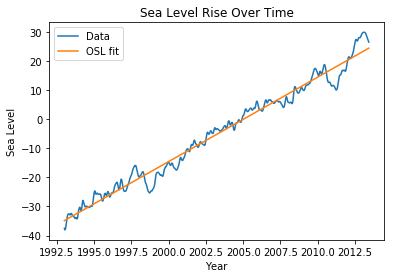

In [4]:
# Part a - Fit linear regression model to training data (find OLS coefficients) #
X_train = sea_level_df['time'].values
Y_train = sea_level_df['level_variation'].values

var = np.var(X_train, ddof=1)
cov = np.cov(X_train, Y_train)
cov = cov[0][1]

coefficient = cov/var
intercept = np.mean(Y_train) - coefficient*np.mean(X_train)

# Predict using OLS model
regression_curve = coefficient*X_train+intercept

# Plot training data along with the regression curve
plt.plot(X_train, Y_train, X_train, regression_curve)
plt.title('Sea Level Rise Over Time')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend(['Data', 'OSL fit'])

MSE =  90.73366367291993


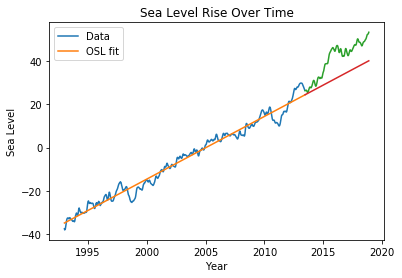

In [5]:
# Part b - Prediction of testing points #
X_test = sea_level_df_test['time'].values
Y_test = sea_level_df_test['level_variation'].values

test_predictions = coefficient*X_test+intercept

# Calculate mean squared error between ground truth and predictions
n = Y_test.shape[0]
sigma = 0

for i in range(n):
    sigma = sigma + (Y_test[i] - test_predictions[i])**2

MSE = sigma/n

print('MSE = ', MSE)
plt.plot(X_train, Y_train, X_train, regression_curve, X_test, Y_test, X_test, test_predictions)
plt.title('Sea Level Rise Over Time')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.legend(['Data', 'OSL fit'])

Rolling mean, window size:  5


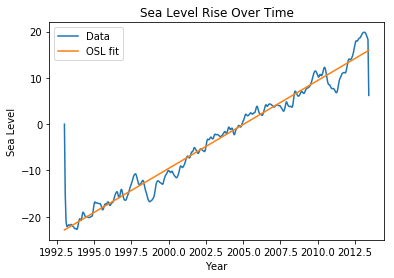

MSE =  46.69961123549502


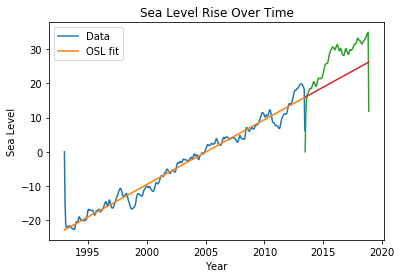

Rolling mean, window size:  7


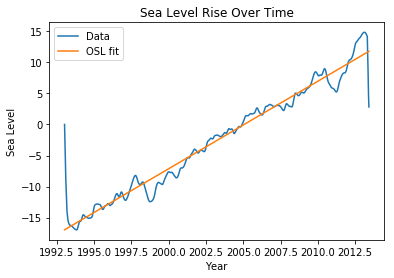

MSE =  29.380710439606474


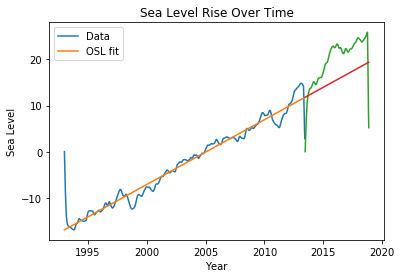

Rolling mean, window size:  15


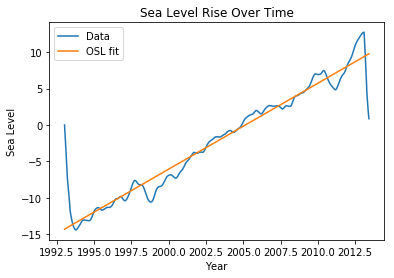

MSE =  30.53261979450508


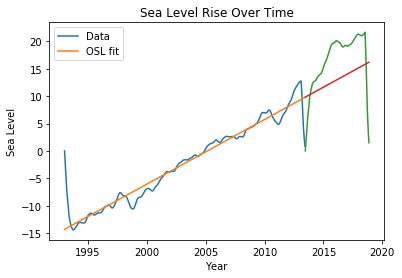

In [6]:
# Part c - data transformations #
# ROLLING MEAN
X_train = sea_level_df['time'].values
Y_train = sea_level_df['level_variation'].values
X_test = sea_level_df_test['time'].values
Y_test = sea_level_df_test['level_variation'].values

def part_a_and_b(X_tr, Y_tr, X_tst, Y_tst):
    # OLS
    var = np.var(X_tr, ddof=1)
    cov = np.cov(X_tr, Y_tr)
    cov = cov[0][1]

    coeff = cov/var
    interc = np.mean(Y_tr) - coeff*np.mean(X_tr)

    # Predict using OLS model
    reg_curve = coeff*X_tr+interc

    # Plot training data along with the regression curve
    plt.figure()
    plt.plot(X_tr, Y_tr, X_tr, reg_curve)
    plt.title('Sea Level Rise Over Time')
    plt.xlabel('Year')
    plt.ylabel('Sea Level')
    plt.legend(['Data', 'OSL fit'])
    plt.show()
    
    test_pred = coeff*X_test+interc

    # Calculate mean squared error between ground truth and predictions
    n = Y_tst.shape[0]
    sig = 0

    for i in range(n):
        sig = sig + (Y_tst[i] - test_pred[i])**2

    MSE = sig/n

    print('MSE = ', MSE)
    plt.figure()
    plt.plot(X_tr, Y_tr, X_tr, reg_curve, X_tst, Y_tst, X_tst, test_pred)
    plt.title('Sea Level Rise Over Time')
    plt.xlabel('Year')
    plt.ylabel('Sea Level')
    plt.legend(['Data', 'OSL fit'])
    plt.show()

# Repeat parts a and b for rolling mean
def rolling_mean_tranform(window_size, data):
    rolling_mean = data
    for i in range(rolling_mean.shape[0]):
        mean = 0 
        for j in range(i-(window_size//2), i+(window_size//2)):
            if not (j<window_size//2 or j>rolling_mean.shape[0]-(window_size//2)):
                mean = mean + (data[j]/window_size)
        rolling_mean[i] = mean
        
    return rolling_mean
    
def rolling_mean(window_size):
    rm_train = rolling_mean_tranform(window_size, Y_train)
    rm_test = rolling_mean_tranform(window_size, Y_test)
    
    print("Rolling mean, window size: ", window_size)
    part_a_and_b(X_train, rm_train, X_test, rm_test)

rolling_mean(5)
rolling_mean(7)
rolling_mean(15)

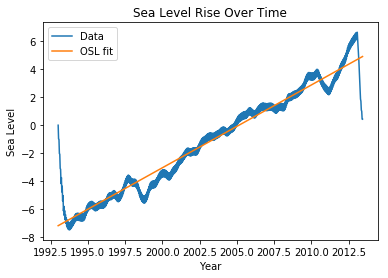

MSE =  7.76795462092171


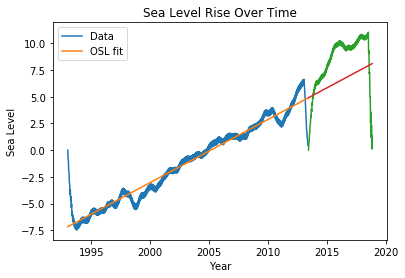

In [7]:
# Part c - data transformations #
# FIRST ORDER DIFFERENCING
X_train = sea_level_df['time'].values
Y_train = sea_level_df['level_variation'].values
X_test = sea_level_df_test['time'].values
Y_test = sea_level_df_test['level_variation'].values

def first_order_differencing(data):
    differencing = data
    for i in range(differencing.shape[0]):
        if i!=0:
            differencing[i] = data[i] - data[i-1]
        else:
            differencing[i] = 0
    return differencing

diff_train = first_order_differencing(Y_train)
diff_test = first_order_differencing(Y_test)

part_a_and_b(X_train, diff_train, X_test, diff_test)

# Repeat parts a and b for first order differencing

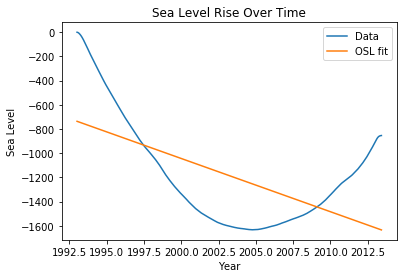

MSE =  6632388.723218271


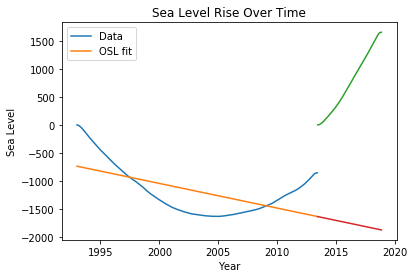

In [8]:
# Part c - data transformations #
# YOUR OWN TRANSFORMATION
# I will take the sum of 3 consecutive points
X_train = sea_level_df['time'].values
Y_train = sea_level_df['level_variation'].values
X_test = sea_level_df_test['time'].values
Y_test = sea_level_df_test['level_variation'].values

def summing(data):
    summing = data
    for i in range(summing.shape[0]):
        if i>0:
            summing[i] = data[i] + data[i-1]
        else:
            summing[i] = 0
    return summing

diff2_train = summing(Y_train)
diff2_test = summing(Y_test)
        
# Repeat parts a and b for your own transformation

part_a_and_b(X_train, diff2_train, X_test, diff2_test)

## Problem 2: K-Nearest Neighbors

Consider the following five two-dimensional training points, belonging to class + or class -:

$(0,1,+)$

$(1,1,-)$

$(2,2,+)$

$(2,0,+)$

$(3,1,-)$

**a.** Plot these five points. Then, draw the decision boundary for a **1-nearest-neighbor classifier (with Euclidean distance).** *Be sure to show or explain how you found your decision boundary.*

**b.** Classify the following test points, and add them to your plot:

$(0,0)$

$(1,2)$

$(2,1)$

$(3,3)$

$(4,3)$

*Be sure to explain how you classified the test points.*

**c.** As you may or may not have seen in part b, it is possible for two neighbors with different class labels to have identical distances to a test point. In that case, explain how to choose a class for this point.

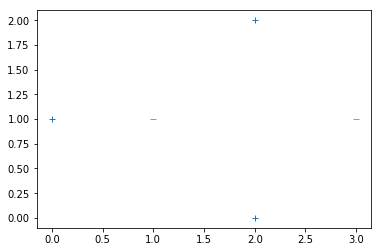

In [9]:
# part a - plot points and decision boundry #
# plot points #
pos = np.array([[0,1], [2, 2], [2, 0]])
posx, posy = pos.T
neg = np.array([[1,1], [3,1]])
negx, negy = neg.T

plt.plot(posx, posy, '+', negx, negy, '_')

# The decision boundary will be the line where the distances to the nearest + point and the distance to the nearest - point will be the same

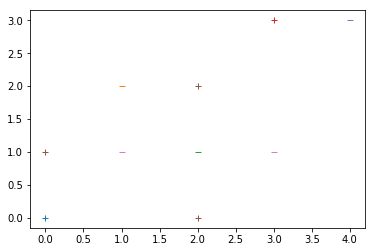

In [10]:
# part b - Classify test points and add them to the plot #
pos = np.array([[0,1], [2, 2], [2, 0]])
neg = np.array([[1,1], [3,1]])
test_data = np.array([[0,0], [1,2], [2,1], [3,3], [4,3]])

for i in test_data:
    shortest_pos = 100000
    shortest_neg = 100000
    for j in pos:
        distance = np.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)
        if distance < shortest_pos:
             shortest_pos = distance
    for j in neg:
        distance = np.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)
        if distance < shortest_neg:
             shortest_neg = distance
    if(shortest_neg>shortest_pos):
        plt.plot(i[0], i[1], '+')
    else:
        plt.plot(i[0], i[1], '_')

posx, posy = pos.T
negx, negy = neg.T
plt.plot(posx, posy, '+', negx, negy, '_')

Part c
There are a few ways you can classify the point in these situations. 
One way is to pre-decide on one class for the point to be assigned to when it is equidistant from bothe classes, as I have done in part b. 
Another way is to expand the search radius of your NN algorithm, to continue and find the next nearest neighbor, and classify your new point to whatever this next nearest neighbor is

## Problem 3: Nearest Neighbors vs. Decision Trees

Not all machine learning algorithms perform well on all types of data; performance is often dependent on how the data is distributed. We ask you to compare the performance accuracies of k-nearest neighbors and decision trees on two datasets: the Iris dataset and the wine dataset.

The Iris flower dataset contains samples of attributes of 3 different variations of Iris flowers. This dataset has become very commonly used in training classification models. In fact, it has become so common that it exists within scikit-learn. The wine dataset contains attributes of 3 different types of wine. The datasets are imported and split into training and testing sets below for you. You can also get a preview of what they look like by running the two cells below.

**a.** Using the `KNeighborsClassifier` and `DecisionTreeClassifier` from scikit-learn, train and test k-nearest neighbors and decision trees on both datasets. When training the k-nearest neighbor algorithm, **do not choose a random number of neighbors, but instead *find the k that achieves the best accuracy in the range 1-10***. Compute the accuracies of each method (hint: you can use scikit-learn's `metrics.accuracy_score`).

**b.** Compare the accuracies of each algorithm on each dataset. **If there is a difference in their performance, why do you think this would be?**

*Please note that since sampling of data is random, accuracies may differ when you run the code again, and they will differ among your peers.*

In [11]:
# Import Iris dataset from scikit-learn, as well as algorithms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Split data into training and testing sets
X = iris.data
y = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X, y, test_size = 0.3) # here, our test set is 30% of whole set

# Show what Iris data looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# Load wine dataset
wine_df = pd.read_csv("wine.csv", names = ["class", "alc", "malic acid", "ash", "alcalinity", "mg", "phenols", "flavanoid", "nonflav phenols", "proanth", "color", "hue", "OD280/OD315", "proline"])

# Split dataset into train and test sets
X = wine_df
y = wine_df.pop('class')

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size = 0.3)

# Show what wine dataset looks like
wine_df.head()

,alc,malic acid,ash,alcalinity,mg,phenols,flavanoid,nonflav phenols,proanth,color,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# IRIS DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set
def KNN_acc_calc(X_train, y_train, X_test, y_test):
    KNN_best_acc = 0
    for i in range(1,10):
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(X_train, y_train)
        KNN_pred = KNN.predict(X_test)
        KNN_acc = metrics.accuracy_score(y_test, KNN_pred)
        if KNN_acc>KNN_best_acc:
            KNN_best_acc = KNN_acc
    return KNN_best_acc

# Construct a decision tree on the training data.
# Test decision tree with testing set
def DT_acc_calc(X_train, y_train, X_test, y_test):
    DT = DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    DT_pred = DT.predict(X_test)
    DT_acc = metrics.accuracy_score(y_test, DT_pred)
    return DT_acc


# Compare accuracies between the two algorithms (print them out)
print('KNN best accuracy (from testing k=1 to 10): ', KNN_acc_calc(X_iris_train, y_iris_train, X_iris_test, y_iris_test))
print('Decision tree accuracy: ', DT_acc_calc(X_iris_train, y_iris_train, X_iris_test, y_iris_test))

KNN best accuracy (from testing k=1 to 10):  0.9555555555555556
Decision tree accuracy:  0.9111111111111111


In [14]:
# WINE DATASET #

# Construct the nearest neighbors classifier.
# Fit the model to the data, and find the k which achieves the best accuracy in the range 1-10.
# Test KNN with testing set
KNN_best_acc = 0
for i in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=i+1)
    KNN.fit(X_wine_train, y_wine_train)
    KNN_pred = KNN.predict(X_wine_test)
    KNN_acc = metrics.accuracy_score(y_wine_test, KNN_pred)
    if KNN_acc>KNN_best_acc:
        KNN_best_acc = KNN_acc

# Construct a decision tree on the training data.
# Test decision tree with testing set
DT = DecisionTreeClassifier()
DT.fit(X_wine_train, y_wine_train)
DT_pred = DT.predict(X_wine_test)
DT_acc = metrics.accuracy_score(y_wine_test, DT_pred)


# Compare accuracies between the two algorithms (print them out)
print('KNN best accuracy (from testing k=1 to 10): ', KNN_acc_calc(X_wine_train, y_wine_train, X_wine_test, y_wine_test))
print('Decision tree accuracy: ', DT_acc_calc(X_wine_train, y_wine_train, X_wine_test, y_wine_test))

KNN best accuracy (from testing k=1 to 10):  0.7962962962962963
Decision tree accuracy:  0.8888888888888888


Part b

For the iris data set, the KNN model is more accurate, however for the wine data set, it is the decision tree model that is more accurate. This is due to the fact that the wine data set has more dimensions, so due to the curse of dimentionality, KNN becomes less accurate with more dimensions.

## Problem 4: Curse of Dimensionality and Nearest Neighbors

**Please note that you may find it easier to program this question in MATLAB. If you choose to use MATLAB, please submit a separate .m file with your code solution and either insert your plots into Jupyter (or, submit a separate document with the plots through Blackboard).**

Consider $n$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin, and suppose we are interested in nearest neighbors to the origin. It can be shown that the median distance from the origin to the closest data point under this scenario is given by the expression $(1-(\frac{1}{2})^{\frac{1}{n}})^{\frac{1}{p}}$. 

Now consider the following alternative scenario. Suppose $n$ data points are chosen uniformly
from $[−1, 1]^p$ (the interval $[−1, 1]$ in p dimensions). Now consider the nearest neighbor to a point at the origin in terms of the $l_∞$ norm: $\|x − y\|_∞ = max_i|x_i − y_i|$.

**a.** Write a piece of code that generates $n$ data points in $p$ dimensions distributed uniformly
in $[−1, 1]^p$, and computes the $l_∞$ nearest neighbors to the origin. For $n = 5$, $n = 50$, and $n = 500$, plot the nearest neighbor distances as a function of $p$, for $p = 1$ to $200$. On the same plot(s), also show the curves corresponding to the median distance expression given above.

**b.** What do you observe about the relationship between the formula and the $l_∞$ nearest neighbor distances? *Discuss and interpret all of your plots.*

**c. *Bonus*** Prove a relationship between the ∞ nearest neighbor distances and the above formula.

n =  5


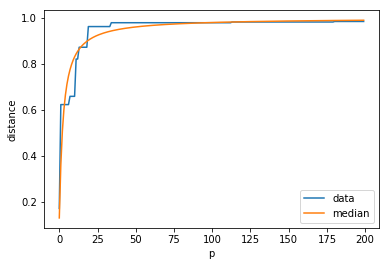

n =  5


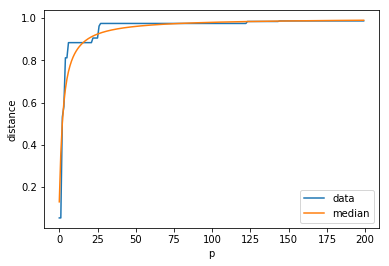

n =  5


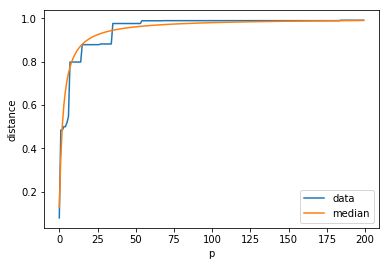

In [15]:
# Plot n p-dimensional uniformly-distributed data points


for n_pts in (5, 50, 500):
    n_pts=5
    points = np.random.uniform(low=-1,high=1,size=(n_pts,200))
    NN_distances = np.zeros((200,1))
    median_distances = np.zeros((200,1))
    for p_max in range(1,201):
        temp_distances = np.zeros((n_pts,1))
        for n in range(n_pts):
            max = 0
            for p in range(p_max):
                if np.abs(points[n][p]) > max:
                    temp_distances[n][0] = np.abs(points[n][p])
                    max = np.abs(points[n][p])
        min = 2
        for n in range(n_pts):
            if(temp_distances[n][0] < min):
                min = temp_distances[n][0]
        NN_distances[p_max-1][0] = min
        median_distances[p_max-1][0] = ((1-(0.5**(1/n_pts)))**(1/p_max))
    print('n = ', n_pts)
    plt.figure()
    plt.plot(range(200), NN_distances, label='data')
    plt.plot(range(200), median_distances, label='median')
    plt.xlabel('p')
    plt.ylabel('distance')
    plt.legend()
    plt.show()
    

# Compute nearest neighbors to the origin in terms of maximum norm


# Plot nearest neighbor distances as a function of p = 1:200 for n = 5, 50, 500. Plot curves 
# corresponding to the median distance expression on the same figure.

**`[double click here to add plots, if you programmed your solution outside Jupyter]`**